In [3]:
x_voltage = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to calculate mean, standard deviation, and 90% confidence interval
def calculate_stats(block):
    mean_value = np.mean(block)
    std_dev = np.std(block)
    confidence_interval = stats.norm.interval(0.95, loc=mean_value, scale=std_dev/np.sqrt(len(block)))
    return mean_value, std_dev, confidence_interval

def analyze(filename):
    # Read the current measurements from the text file
    with open(filename, 'r') as file:
        data = [float(line.strip()) / 10 for line in file]

    # Divide the data into 10 blocks of 100 readings each
    blocks = [data[i:i+100] for i in range(0, 1000, 100)]

    # Calculate stats for each block and filter outliers
    block_stats = []
    filtered_blocks = []

    for block in blocks:
        mean, std_dev, confidence_interval = calculate_stats(block)
        outliers = [value for value in block if value < confidence_interval[0] or value > confidence_interval[1]]
        filtered_block = [value for value in block if value not in outliers]

        filtered_blocks.append(filtered_block)
        #mean, std_dev, confidence_interval = calculate_stats(filtered_block)
        
        block_stats.append((mean, std_dev, confidence_interval))

    # Plotting the summary plot
    means = [stats[0] for stats in block_stats]
    std_devs = [stats[1] for stats in block_stats]
    confidence_intervals = [(stats[2][1] - stats[2][0]) / 2 for stats in block_stats]



    print('Mean Values:', means)
    print('Standard Deviations:', std_devs)
    print('Confidence Intervals:', confidence_intervals)

    plt.errorbar(range(1, 11), means, yerr=confidence_intervals, fmt='o', capsize=5)
    plt.title('Summary Plot of Mean Values with 99% Confidence Intervals')
    plt.xlabel('Sample Number')
    plt.ylabel('Mean Current (mA)')
    #plt.ylim(0, 250)
    plt.show()

    return block_stats

In [5]:
def combine(data):
    # Number of samples per resistor value
    num_samples = len(data[0])

    sample_means = [stats[0] for stats in data]
    sample_std_devs = [stats[1] for stats in data]

    # Calculate overall mean and standard deviation
    overall_mean = np.mean(sample_means)
    overall_std_dev = np.mean(sample_std_devs)

    # Calculate confidence interval for the overall mean
    mean_ci = stats.t.interval(0.99, df=num_samples - 1, loc=overall_mean, scale=stats.sem(sample_means))

    print("----------------------------------------")
    print(f"  Mean: {overall_mean}")
    print(f"  Standard Deviation: {overall_std_dev}")
    print(f"  95% Confidence Interval: {mean_ci}")
    print()

    return [(overall_mean, overall_std_dev, mean_ci)]

In [6]:
data_y = []

Mean Values: [55.181000000000004, 54.97800000000001, 55.14900000000001, 55.11200000000001, 55.15, 55.160999999999994, 55.09200000000001, 55.04600000000001, 55.22500000000001, 55.12399999999999]
Standard Deviations: [2.0369926362164397, 2.43616830288878, 2.034969041533556, 2.3126729124543317, 2.1991589301367016, 2.4762833036629712, 2.674721667762835, 2.5250512866078583, 2.4109904603710066, 2.246691790166154]
Confidence Intervals: [0.39924322037575166, 0.4774802133940099, 0.398846603105973, 0.4532755616431814, 0.43102722993475595, 0.4853426090697255, 0.5242358137484047, 0.49490095808679513, 0.4725454469396837, 0.44034349930874583]


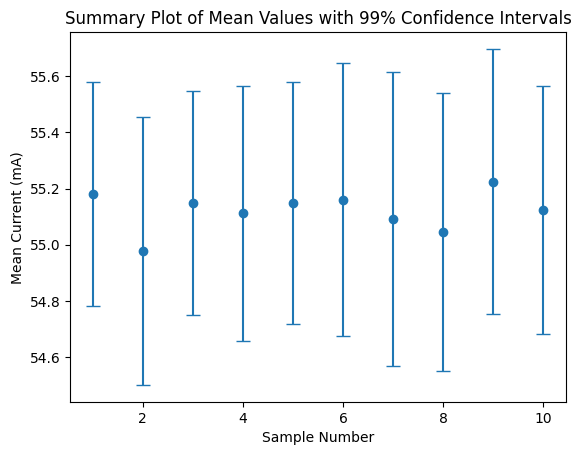

----------------------------------------
  Mean: 55.12180000000001
  Standard Deviation: 2.3353700331800633
  95% Confidence Interval: (54.900764237187275, 55.34283576281274)



In [7]:
data_y.append(combine(analyze('15ohm 0,8v.txt')))

Mean Values: [71.52199999999999, 71.62200000000001, 71.56200000000001, 71.756, 71.62, 71.676, 71.381, 71.5, 71.207, 71.429]
Standard Deviations: [0.9568260029911394, 0.8977282439580473, 0.9360320507333066, 0.9254534023925791, 0.8534635317340747, 0.9099582408000922, 1.005355161124665, 0.8448668534153773, 1.024036620438937, 1.1142077903156125]
Confidence Intervals: [0.18753445053340556, 0.1759515026062104, 0.18345891078124055, 0.18138553380595113, 0.1672757784317156, 0.17834853794036576, 0.19704599074758278, 0.16559086044257754, 0.20070748949103745, 0.21838071403125525]


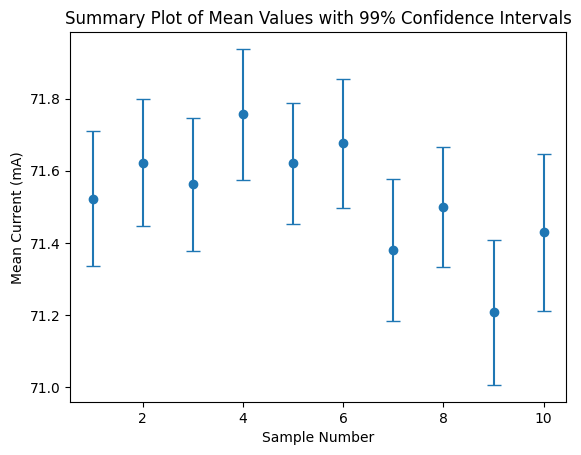

----------------------------------------
  Mean: 71.5275
  Standard Deviation: 0.9467927897903831
  95% Confidence Interval: (71.02838519311459, 72.02661480688542)



In [8]:
data_y.append(combine(analyze('15ohm 1,0v.txt')))

Mean Values: [88.02799999999999, 87.887, 88.04199999999999, 87.814, 87.89100000000002, 87.95100000000001, 88.03200000000001, 88.05099999999999, 88.01100000000001, 87.99100000000003]
Standard Deviations: [2.1708560523443285, 1.8337750679949818, 1.9757621314318186, 1.7272533108956543, 1.85919848321797, 2.088755371028403, 2.140041121100246, 2.109336151494114, 2.049336234003586, 2.145604576803471]
Confidence Intervals: [0.42547996782157327, 0.3594133089017646, 0.3872422619624416, 0.33853542815330684, 0.364396206721878, 0.4093885299730289, 0.4194403522791248, 0.4134222888216783, 0.40166252108599565, 0.4205307695599174]


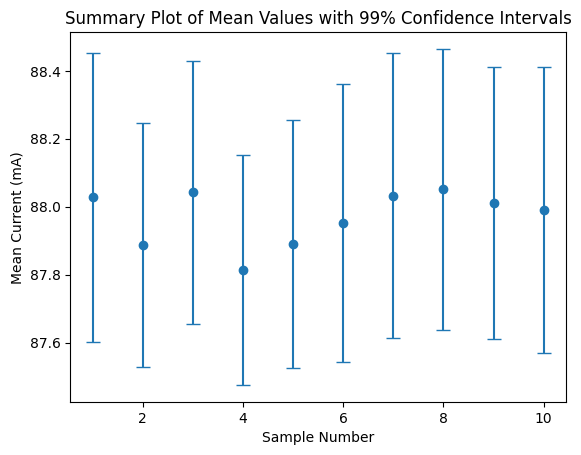

----------------------------------------
  Mean: 87.96979999999999
  Standard Deviation: 2.009991850031457
  95% Confidence Interval: (87.71589810306669, 88.22370189693329)



In [9]:
data_y.append(combine(analyze('15ohm 1,2v.txt')))

Mean Values: [104.774, 104.74699999999999, 104.92200000000001, 104.73, 104.697, 104.699, 104.808, 104.95599999999999, 104.80599999999998, 104.021]
Standard Deviations: [4.383984945229625, 4.105008038968986, 4.23271969305788, 4.122220275531137, 3.957738116651985, 4.022101316476252, 3.9738314005503557, 4.1055893608591685, 3.884348594037358, 10.053052223081309]
Confidence Intervals: [0.8592452601415914, 0.8045667912626584, 0.8295978155046839, 0.8079403276381782, 0.7757024168879241, 0.7883173722464534, 0.7788566425713128, 0.8046807282594841, 0.7613183347712038, 1.9703620291939643]


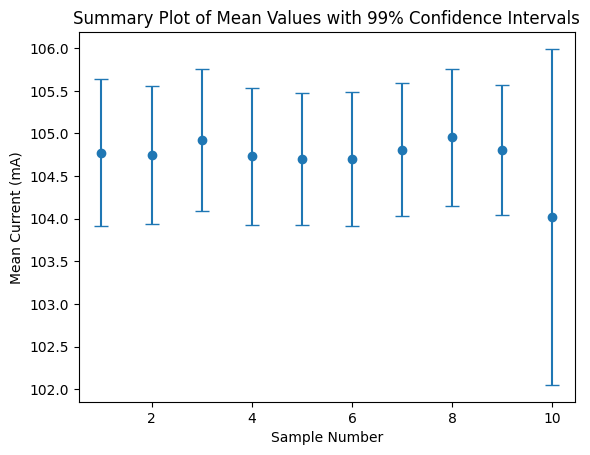

----------------------------------------
  Mean: 104.71600000000001
  Standard Deviation: 4.684059396444405
  95% Confidence Interval: (103.90240765334683, 105.52959234665319)



In [10]:
data_y.append(combine(analyze('15ohm 1,4v.txt')))

Mean Values: [121.999, 121.54, 121.77999999999999, 121.95200000000001, 121.682, 121.995, 122.11200000000001, 122.57000000000002, 122.25300000000001, 122.03399999999998]
Standard Deviations: [6.1461125111732215, 5.72693635375844, 5.819347042409483, 6.313231818965626, 5.729997905758779, 6.061326175021437, 5.61986263177313, 6.2611580398517335, 5.832057184218961, 5.5964670998764925]
Confidence Intervals: [1.2046159166830535, 1.1224588995119689, 1.140571061666222, 1.2373706991224935, 1.1230589526777095, 1.1879981001591915, 1.1014728356337855, 1.227164425962286, 1.1430622036847211, 1.0968873956421277]


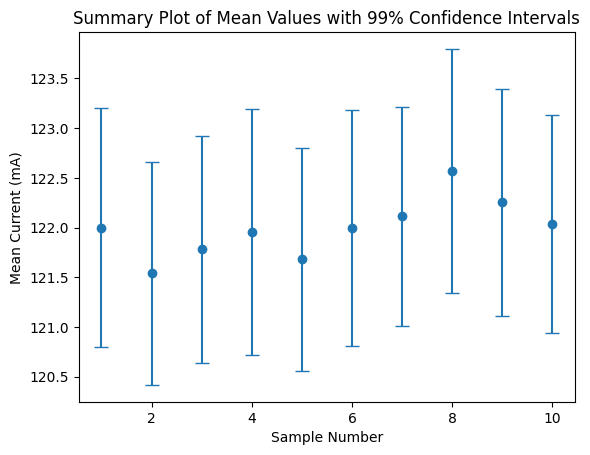

----------------------------------------
  Mean: 121.9917
  Standard Deviation: 5.91064967628073
  95% Confidence Interval: (121.07645096345614, 122.90694903654385)



In [11]:
data_y.append(combine(analyze('15ohm 1,6v.txt')))

Mean Values: [137.40699999999998, 137.43500000000003, 137.283, 137.553, 137.523, 137.00699999999998, 137.462, 137.662, 137.14, 137.36800000000002]
Standard Deviations: [7.32205237621256, 7.428975366764924, 7.254943900541203, 7.604978040730952, 7.436112626903925, 7.006386443809675, 7.708330299098501, 7.999572238563761, 6.967826059826695, 7.405172246477458]
Confidence Intervals: [1.4350958950292636, 1.4560524160894488, 1.4219428754919363, 1.4905483063050724, 1.4574512933715198, 1.3732265091636577, 1.5108049767171963, 1.5678873479311335, 1.365668812780001, 1.451387090241127]


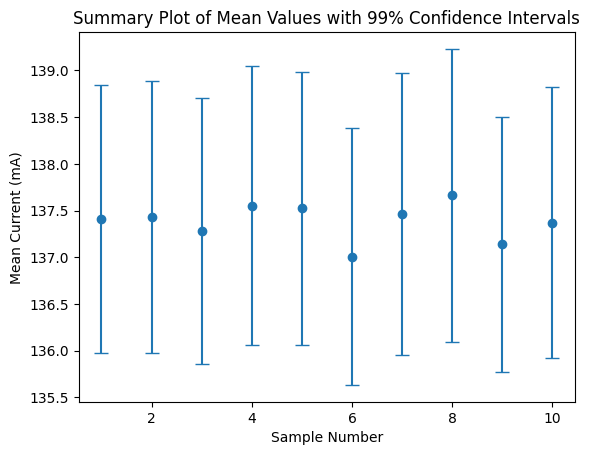

----------------------------------------
  Mean: 137.38399999999996
  Standard Deviation: 7.413434959892966
  95% Confidence Interval: (136.76817789718814, 137.99982210281178)



In [12]:
data_y.append(combine(analyze('15ohm 1,8v.txt')))

Mean Values: [157.572, 158.045, 157.775, 158.015, 157.65999999999997, 157.768, 157.62400000000002, 157.616, 157.722, 157.83899999999997]
Standard Deviations: [10.466165295847375, 11.392255044546712, 10.971247650107987, 11.258511224846735, 10.72388921986795, 10.246627542757667, 10.975491970750104, 10.936075347216661, 10.64413998404756, 11.17310068870768]
Confidence Intervals: [2.0513307036103754, 2.23284095900064, 2.1503250259681295, 2.20662765202394, 2.101843664513865, 2.0083020946801184, 2.151156897527869, 2.1434313812760877, 2.086213101513607, 2.1898874945506748]


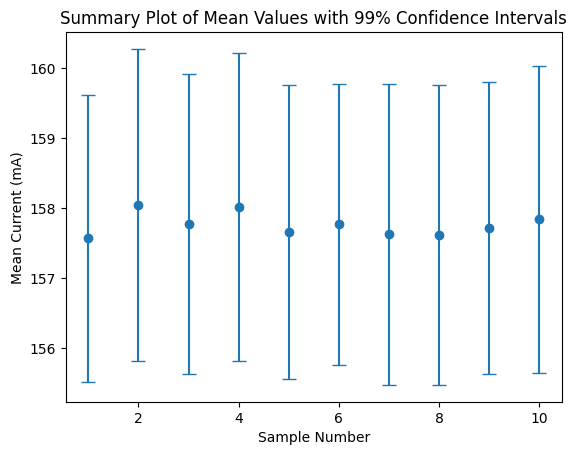

----------------------------------------
  Mean: 157.76359999999997
  Standard Deviation: 10.878750396869641
  95% Confidence Interval: (157.25250494388823, 158.2746950561117)



In [13]:
data_y.append(combine(analyze('15ohm 2v.txt')))

In [14]:
#x_values = list(np.repeat(x_voltage, 1))
x_values = x_voltage 

means = []
std_devs = []
confidence_intervals = []

for i in range(len(data_y)):
    means += [data_y[i][j][0] for j in range(len(data_y[i]))]
    std_devs += [data_y[i][j][1] for j in range(len(data_y[i]))]
    confidence_intervals += [data_y[i][j][2] for j in range(len(data_y[i]))]

print('Mean Values:', means)
print(data_y)

Mean Values: [55.12180000000001, 71.5275, 87.96979999999999, 104.71600000000001, 121.9917, 137.38399999999996, 157.76359999999997]
[[(55.12180000000001, 2.3353700331800633, (54.900764237187275, 55.34283576281274))], [(71.5275, 0.9467927897903831, (71.02838519311459, 72.02661480688542))], [(87.96979999999999, 2.009991850031457, (87.71589810306669, 88.22370189693329))], [(104.71600000000001, 4.684059396444405, (103.90240765334683, 105.52959234665319))], [(121.9917, 5.91064967628073, (121.07645096345614, 122.90694903654385))], [(137.38399999999996, 7.413434959892966, (136.76817789718814, 137.99982210281178))], [(157.76359999999997, 10.878750396869641, (157.25250494388823, 158.2746950561117))]]


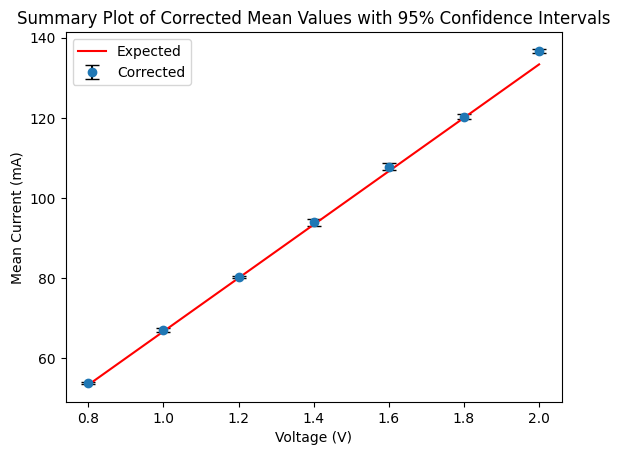

In [15]:
a=1.2393985838010886
b=1
c=-9.388948900526534

y_values_corrected = [value**(1 / b) / a - c for value in means]

y_expected = [(voltage / 15) * 1000  for voltage in x_voltage]
y_expected1 = [(voltage / 15) * 1000 for voltage in x_values]

# Extract the lower and upper bounds of the confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Calculate the error bars correctly
lower_error = [means - lower for means, lower in zip(means, lower_bounds)]
upper_error = [upper - means for means, upper in zip(means, upper_bounds)]

# Plotting the summary plot
plt.errorbar(x_values, y_values_corrected, yerr=[lower_error, upper_error], fmt='o', capsize=5, label='Corrected', ecolor='black')
plt.plot(x_voltage, y_expected, 'r-', label='Expected', marker='')

plt.title('Summary Plot of Corrected Mean Values with 95% Confidence Intervals')
plt.xlabel('Voltage (V)')
plt.ylabel('Mean Current (mA)')
plt.legend()
plt.show()

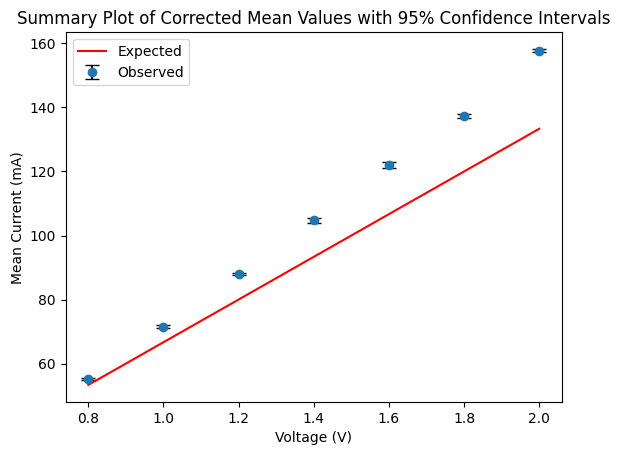

In [16]:
# Plotting the summary plot
plt.errorbar(x_values, means, yerr=[lower_error, upper_error], fmt='o', capsize=5, label='Observed', ecolor='black')
plt.plot(x_voltage, y_expected, 'r-', label='Expected', marker='')

plt.title('Summary Plot of Corrected Mean Values with 95% Confidence Intervals')
plt.xlabel('Voltage (V)')
plt.ylabel('Mean Current (mA)')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Testing for the goodness of fit using the chi-squared test
mse = mean_squared_error(means, y_expected1)
print(f'Mean Squared Error (MSE): {mse}')

r_squared = r2_score(means, y_expected1)
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 193.4010226098407
R-squared: 0.8311851634057359


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Testing for the goodness of fit using the chi-squared test
mse = mean_squared_error(y_values_corrected, y_expected1)
print(f'Mean Squared Error (MSE): {mse}')

r_squared = r2_score(y_values_corrected, y_expected1)
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 1.9251780319042202
R-squared: 0.9974186628299555


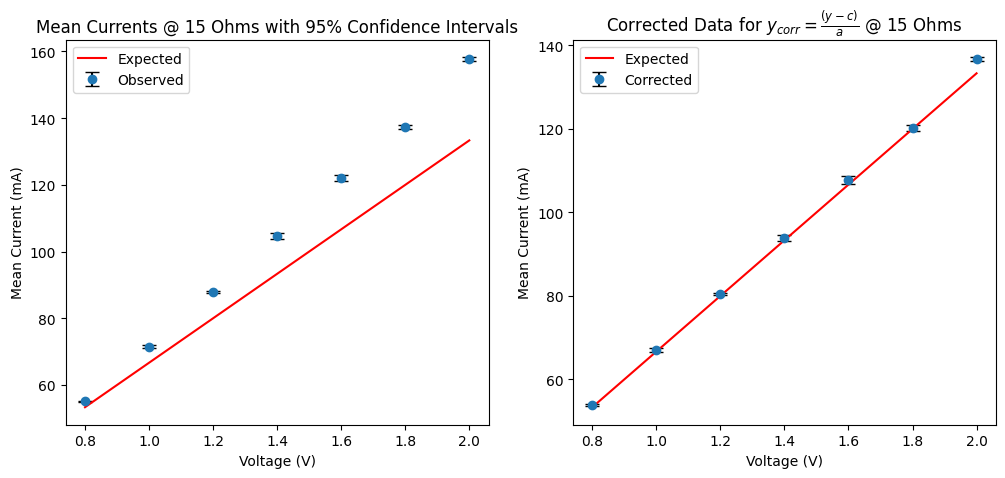

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the summary plot for observed data
axes[0].errorbar(x_values, means, yerr=[lower_error, upper_error], fmt='o', capsize=5, label='Observed', ecolor='black')
axes[0].plot(x_voltage, y_expected, 'r-', label='Expected', marker='')
axes[0].set_title('Mean Currents @ 15 Ohms with 95% Confidence Intervals')
axes[0].set_xlabel('Voltage (V)')
axes[0].set_ylabel('Mean Current (mA)')
axes[0].legend()

# Plotting the summary plot for corrected data
axes[1].errorbar(x_values, y_values_corrected, yerr=[lower_error, upper_error], fmt='o', capsize=5, label='Corrected', ecolor='black')
axes[1].plot(x_voltage, y_expected, 'r-', label='Expected', marker='')
axes[1].set_title('Corrected Data for $y_{corr} = \\frac{(y - c)}{a}$ @ 15 Ohms')
axes[1].set_xlabel('Voltage (V)')
axes[1].set_ylabel('Mean Current (mA)')
axes[1].legend()

plt.savefig('15ohm.png')
plt.show()